# Complex Sentiment Analysis
This notebook gives you the frequency of positive and negaitive words from a Sentiment Lexicon appearing in a dataset. This allows you to see what positive and negative terms are most likely to influence your sentiment results and to make any adjustments that might be needed to your dataset.

#### Opening data files

The needed positive and negative word lists are .csv files found in the [data > twitter > dict](https://github.com/cyberdh/Text-Analysis/tree/master/data/twitter/dict) folder.



### Run CyberDH environment
The code in the cell below points to a Python environment specificaly for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different packages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [1]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download.

In your terminal, packages can be installed by simply typing `pip install nameofpackage --user`. However, since you are using ReD and our Python environment, you will not need to install any of the packages below to use this notebook. Anytime you need to make use of a package, however, you need to import it so that Python knows to look in these packages for any functions or commands you use. Below is a brief description of the packages we are using in this notebook:

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- **re:** Provides regular expression matching operations similar to those found in Perl.
- **json:** Used to parse and manipulate data in JSON format.
- **glob:** Finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.
- **nltk:** Platform for building Python programs to work with human language data. Here we bring in the VADER sentiment analysis tool which is now a part of the nltk package.
- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
- **numpy:** The fundamental package for scientific computing with Python.
- **collections:** Implements specialized container datatypes providing alternatives to Python's general purpose built-in containers, dict, list, set, and tuple.

In [2]:
import pandas as pd
import re
import json
import glob
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

### Variables
Here we create some variables for use later in our code. We do this to minimize the number and complexity of the changes you will need to make later.

First we need to decide if we want to read in one file or a whole directory of files. If you want to read in a whole directory then set `source` equal to `"*"` as this is what is called a regular expression that means 'all'. So we are reading in 'all' the files in a directory. If you wish to read in a single file then set `source` equal to the name of the desired file in quotes, but leaving the '.json' or '.csv' off at the end. So a single file should look like this: `source = "myFileName"`.

Next we assign the file type our data comes in to a variable. At the moment the only options are '.csv' or '.json' as these are the most popular forms that twitter data comes in. We assign the file type to the `fileType` variable. It should look like this: `fileType = ".json"`.

The next three variables we assign column header names to. The `negColHead` variable is the column header for our list of negative words in our '.csv' file. The `posColHead` variable is the column header for our list of positive words in the positive words '.csv' file. Finally, the `tweetColHead` variable is the column header for the resulting dataframe our tweets are stored in further down in the code. If your tweets or positive and negative lexicons have different column headers, then make these adjustments here.

The next four variables are lists where you will add terms that may need to be added or removed from your positive and negative word list. This is because sentiment is often dependent on the topic. When discussing racial relations the word 'supremacy' is generally not a positive term, while a collection of recipes the word is fine. The `remNegWords` variable is where you will add words to remove from the negative list and `negAdds` is where you put words you want to add to the negative list. Always make sure your words are in quotes and separated by a comma. Thus, the `remPosWords` and `posAdds` do the same thing, but for the positive word list.

The remaining variable should not need to be changed. The variable `tweets` is an empty list that will have data added to it further down in the code. 

In [3]:
source = "*"
fileType = ".csv"
negColHead = 'Neg'
posColHead = 'Pos'
tweetColHead = 'text'
remNegWords = ['gun']
negAdds = []
remPosWords = ['trump', 'right']
posAdds = []
tweets = []

### File paths
Here we assign file paths we will need throughout this notebook to variables. This way we only need to make changes here and they will be implemeneted throughout the code. The `homePath` variable uses the `environ` function from the `os` package. This function points to your home directory no matter your operating system (Linux, osX, Windows).

Then we join the `homePath` variable to folders that point to where our data is stored and we assign this file path to the variable `dataHome`. The folder names are in quotes and separated by a comma. 

Next, we again use the `homePath` variable and join it with a file path that points to a folder where we can save any output. We assign this file path to a variable called `dataResults`.

Finally, we assign paths that point to a negative word list and a positive word list from the VADER lexicon to two separate variables. The `negFile` variable is for the negative list and `posFile` is for the positive list. 

You can change any of these to better match your data and your research needs. Just remember to put all folders or file names in quotes and separate them with a comma.

In [8]:
homePath = os.environ['HOME']
dataHome = os.path.join(homePath, 'Text-Analysis-master','data','twitter')
dataResults = os.path.join(homePath, 'Text-Analysis-master', 'Output')
negFile = glob.glob(os.path.join(dataHome, "dict", "negativeVADER.csv"))
posFile = glob.glob(os.path.join(dataHome, "dict", "positiveVADER.csv"))

##### Load the negative words

Here we read in our negative words. First we read in the '.csv' file containing our negative words from the VADER lexicon. Then we turn it into a dataframe and assign the dataframe to the variable `negDf`. Next we change the dataframe to a list and assign the list to the variable `negTokens`. Then we add words to the list that we added to the `negAdds` variable from above, followed by removing any words that we added to the `remNegWords` variable. Lastly, we set the list, which uses a hash table to make looking up an item in the list more efficient. There should be no need to make changes to this code.

In [9]:
for f in negFile:
    negText = pd.read_csv(f, index_col = False)

negDf = pd.DataFrame(negText)
negTokens = negDf[negColHead].tolist()
 
negTokens.extend(negAdds)
for word in list(negTokens):
    if word in remNegWords: 
        negTokens.remove(word)
print(negTokens[-10:])

# list to set for efficient lookup
negTokens = set(negTokens)

['trembles', 'trivial', 'unbiased', 'warsaw', 'wellhole', 'winnower', 'winnowing', 'wiseacres', 'wisecrack', 'wisecracker']


##### Load the positive words

Here we read in our positive words. First we read in the '.csv' file containing our positive words from the VADER lexicon. Then we turn it into a dataframe and assign the dataframe to the variable `posDf`. Next we change the dataframe to a list and assign the list to the variable `posTokens`. Then we add words to the list that we added to the `posAdds` variable from above, followed by removing any words that we added to the `remPosWords` variable. Lastly, we set the list, which uses a hash table to make looking up an item in the list more efficient. There should be no need to make changes to this code.

In [10]:
for f in posFile:
    posText = pd.read_csv(f, index_col = False)

posDf = pd.DataFrame(posText)
posTokens = posDf[posColHead].tolist()
posTokens.extend(posAdds)
for word in list(posTokens):
    if word in remPosWords: 
        posTokens.remove(word)
#if 'right' in posTokens: posTokens.remove('right')
print(posTokens[-10:])

# list to set for efficient lookup
posTokens = set(posTokens)

['paradise', 'perfectly', 'lya', 'ecstacy', 'euphoria', 'sweetheart', 'aml', 'ilu', 'ily', 'magnificently']


#### Here we get tweets if in JSON format

This will read tweets if in JSON format. The only part you will need to change is where it says "JSON/\*". This is where we name the folder and we are telling it to read in all the files in the folder. If you have them in a folder with a different name, then change JSON to the name of your folder. If you want to read in only one JSON file, then replace the '\*' with the name of the file. The 'text' is the standard key for the tweet content that comes with the data twitter gives you, so that shouldn't need to be changed.

In [11]:
if fileType == ".json":

    for filename in glob.glob(os.path.join(dataHome, "JSON", source + fileType)):
        with open(filename, encoding = 'utf-8') as json_data:
            for line in json_data:
                tweets.append(json.loads(line))
    df = pd.DataFrame(tweets)
    df[tweetColHead] = df[tweetColHead].str.replace('[^\x00-\x7F]','')
    df[tweetColHead] = df[tweetColHead].str.replace('[^\w\s]','')
    tweetsTokens = df[tweetColHead].tolist()            
    print(len(df)) 

###### Here we get the tweets if in .csv file

The only parts in this section you will need to change are the filepath and where it says 'text' (with the quotes). You will definitely need to change the filepath to match where you have your dataset stored. You might need to change 'text' if your column containing your tweet content has a different header name. If yours is labeled 'text' already than you do not need to change it.

In [12]:
if fileType == ".csv":
    all_files = glob.glob(os.path.join(dataHome, "CSV", "parkland", source + fileType))     

    df_all = (pd.read_csv(f, encoding  = 'ISO-8859-1') for f in all_files)
    cc_df   = pd.concat(df_all, ignore_index=True)
    tweetsText = pd.DataFrame(cc_df)
    tweetsText[tweetColHead] = tweetsText[tweetColHead].str.replace('[^\x00-\x7F]','')
    tweetsText[tweetColHead] = tweetsText[tweetColHead].str.replace('[^\w\s]','')
    tweetsTokens = tweetsText[tweetColHead].tolist()
    print(tweetsTokens[:6])

['RT canarymission Students of Students for Justice in Palestine Mock the Holocaust \n\nNeverAgain WeRemember\nhttpstcocnPE7dEnik httpstcoXvd6IBiSPe', 'RT canarymission Students of Students for Justice in Palestine Mock the Holocaust \n\nNeverAgain WeRemember\nhttpstcocnPE7dEnik httpstcoXvd6IBiSPe', 'He duped so many NeverAgain MeToo httpstco7u4Vl5UjSR', 'NeverAgain NeverForget  httpstcoTuSZLe5dBb', 'RT MrGoalie35 NeverAgain NeverForget  httpstcoTuSZLe5dBb', 'RT ITB_MINCOM 11thFebruary2018 cameroUn YouthDay \nSouthernCameroons says NeverAgain\nWeWillRESIST cameroUns francesponsored GENOCIDE SLAVERY KLEPTOCRACY ONGOING in the COUNTRY of SouthernCameroons Ambazonia USEmbYaounde BBCAfrica bbcafrique Reuters UKinCameroon dwnews httpstcoPSSgr1N2PD']


## Tokenizing the tweets

Now we will create two functions. The first for tokenizing a tweet, the second for calculating positive/negative words. Note that the calulator function uses the tokenizer function.

In [13]:
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet, posTokenList, negTokenList):
    
    posWordsList = []
    negWordsList = []

    numPosWords = 0 
    numNegWords = 0
    
    theTweetTokens = tokenizer(theTweet)
    
    # Count positive and negative words
    for word in theTweetTokens:
        if word in posTokenList:
            numPosWords += 1
            posWordsList.append(word)
        
        if word in negTokenList:
            numNegWords += 1
            negWordsList.append(word)
        
        
    score = (numPosWords - numNegWords)
    return {'score': score, 'posWordsList' : posWordsList, 'negWordsList' : negWordsList}

# Here is a line for testing this
# print(calculator('"RT @jmichaelkell: To sum it up:', '', '1. Trump - sexual predator', '2. Epstein - convicted pedophile', '3. Milo - pedophilia supporter', '4. Huckabee - pƒ"'))

## Analyzing tweets

Now we will use the calculator to calculate the scores of all the tweets.

In [14]:
# do all calculation once

results = []

for tweet in tweetsTokens:
    results.append(calculator(tweet, posTokens, negTokens))
    
scores = [x['score'] for x in results]

posWordsList = [x['posWordsList'] for x in results]
posWordsList = [item for sublist in posWordsList for item in sublist]

negWordsList = [x['negWordsList'] for x in results]
negWordsList = [item for sublist in negWordsList for item in sublist]

Here we look at the scores and sort them as either positive, negative, or neutral.

In [15]:
# Here we set up the thresholds
posi = 0 # This means there have to be at least 1 positive word
nega = 0 # This means there has to be at least 1 negative words

# Here we prime our variables
numTweets = len(results)
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.


for score in scores:
    if score > posi:
        numPosTweets += 1
       
    elif score < nega:
        numNegTweets += 1
        
    else:
        numNeutTweets += 1
        

# This prints out the results 
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))


Total: 155542
Positive: 50466
Neutral: 58217
Negative: 46859


#### Gathering positive tweets

This will gather all examples of positive tweets.

In [16]:
# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = len(results)
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.



for idx, score in enumerate(scores):
    if score > posi:
        posiTweetList.append(tweetsTokens[idx])
        numPosTweets += 1
        
        if numPosTweets >= numberWanted:
            break

print(posiTweetList)

['RT esrailian Thank you  we are honored to share these stories HumanRights NeverForget NeverAgain thepromisefilm ThePromiseToAct httpstcoSBQRYMCSnq', 'So good and reassuring to see the media and academia in the Philippines join hands as freedom of the press and democracy seem to be once again under attack Way to go We live in the age of disinformation and we need to get organized to fight back DefendPressFreedom NeverAgain httpstcokjqlhHcdsi', 'rblanchard0594 ColleenBoykin1 GoaGoaZwerg jnnyjny Youre right teaching history matters amp thank your teacher for this However we must learn from history to prevent mistakes of the past Im sure you realize what is happening now is not normal a', 'If youre like me and are about to blow a gasket reading the obsequious disgraceful press coverage of the NK regime in the past 48 hours please consider supporting bethanyshondark and her efforts to help defectors get out of that torturous hellhole NeverAgain NorthKorea httpstcoZ3H8bpIlXq']


#### Gathering negative tweets

This will gather examples of negative tweets.

In [17]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 negative word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = len(results)
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for idx, score in enumerate(scores):
    if score < nega:
        negaTweetList.append(tweetsTokens[idx])
        numNegTweets += 1
        
        if numNegTweets >= numberWanted:
            break
        

print(negaTweetList)

['Watch now behindthemovement  tonight RosaParks thought about the face of young EmmettTill the murder and aquittal of his murderers RoyBryant and JWMilam injustice NeverForget NeverAgain nomoresteppingofftheroadanymore JusticeforEmmettTill httpstco157R6ELdAu', 'Eggs fall and hash browns get ruined and I get moody neveragain', 'kimgarner4181 No doubt I worked 45 hours during exam week neveragain', 'Delta DeltaAssist worst airline amp customer service Ive ever witnessed 65 delays cancelled flight not even a water and offered 100 my phone call to you was more than that Disgraceful neveragain detroitshambles']


##### Testing a tweet
Here we can test and see what the score of an individual tweet is using the VADER dictionary as a simple poitive/negative list of words.

In [18]:
tweetToCalc = input("What is the tweet to calculate? ")
res = calculator(tweetToCalc, posTokens, negTokens)
print(res['score'])

What is the tweet to calculate? Watch now behindthemovement  tonight RosaParks thought about the face of young EmmettTill the murder and aquittal of his murderers RoyBryant and JWMilam injustice NeverForget NeverAgain nomoresteppingofftheroadanymore JusticeforEmmettTill httpstco157R6ELdAu
-3


Here you can take a tweet and test it to see which positive or negative words it contains using the VADER dictionary as a simple poitive/negative list of words.

In [19]:
tweet2Process = input("What tweet do you want to process? ")
res = calculator(tweet2Process, posTokens, negTokens)
print("Positive words: " + str(res['posWordsList'][:10]))
print("Negative words: " + str(res['negWordsList'][:10]))

What tweet do you want to process? Watch now behindthemovement  tonight RosaParks thought about the face of young EmmettTill the murder and aquittal of his murderers RoyBryant and JWMilam injustice NeverForget NeverAgain nomoresteppingofftheroadanymore JusticeforEmmettTill httpstco157R6ELdAu
Positive words: []
Negative words: ['murder', 'murderers', 'injustice']


## Gathering and plotting all positive and negative words

#### Gathering and positive and negative words

This will gather the words that are positive and negative in the tweets and tabulate them.

In [20]:
# Here we set up the thresholds
posi = 0 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables

numTweets = len(results)
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for score in scores:
  
    if score > posi:
        numPosTweets += 1
       
    elif score < nega:
        numNegTweets += 1
     
    else:
        numNeutTweets += 1
        

print("Positive words: " + str(len(posWordsList)))
print("Negative words: " + str(len(negWordsList)))

Positive words: 157800
Negative words: 150306


In [21]:
posDist = nltk.FreqDist(posWordsList)
posit = Counter(posDist)
positdf = pd.DataFrame.from_dict(posit, orient='index').reset_index()
positdf = positdf.rename(columns={'index':'word', 0:'freq'})
positdf = positdf.sort_values('freq', ascending = False)
posdf = positdf[:25]
posdf.head(10)

,word,freq
22,like,7439
36,please,4348
64,want,3945
185,kidding,3849
35,well,3827
16,support,3657
39,party,3302
206,protect,3255
109,top,2893
3,thank,2710


In [22]:
negDist = nltk.FreqDist(negWordsList)
nega = Counter(negDist)
negadf = pd.DataFrame.from_dict(nega, orient='index').reset_index()
negadf = negadf.rename(columns={'index':'word', 0:'freq'})
negadf = negadf.sort_values('freq', ascending = False)
negdf = negadf[:25]
negdf.head(10)

,word,freq
16,no,11721
287,violence,5159
115,stop,3636
257,assault,3612
365,anger,3343
202,problem,2887
297,weapons,2409
73,sorry,2299
250,victims,2211
29,disgusting,2133


In [23]:
freqDF = pd.concat([posdf, negdf], ignore_index=True)

###### Positive words

Here we plot the top positive words found in our dataset. The places where changes might need to be made are where it says color =['darkgreen'] where it says fig.set_title, and where it says plt.savefig. The color you can change to a different color of your choosing, so if you do not like dark green, pick something else. The title you will want to change what is in quotes so the title will better fit your own dataset, and finally, plt.savefig you will want to change the filepath part in quotes to point to where you want the .png output file saved as well as what you want the name of the file to be.

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


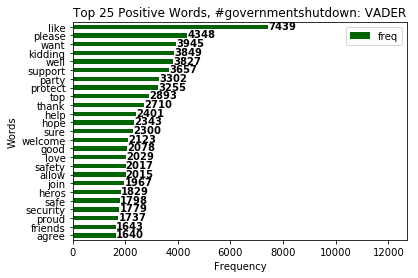

In [24]:
%matplotlib inline

fig = posdf.plot(x= 'word',kind='barh', align='center', color =['darkgreen'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Positive Words, #governmentshutdown: VADER')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,1000 + max(freqDF['freq']))

for i, v in enumerate(posdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig(os.path.join(dataResults, 'gvshutdownPosWordsVader.png'), format='png', dpi=300, bbox_inches='tight',)
plt.show()

###### Negative words

Here we plot the top negative words found in our dataset. The places where changes might need to be made are where it says color =['darkred'] where it says fig.set_title, and where it says plt.savefig. The color you can change to a different color of your choosing, so if you do not like dark red, pick something else. The title you will want to change what is in quotes so the title will better fit your own dataset, and finally, plt.savefig you will want to change the filepath part in quotes to point to where you want the .png output file saved as well as what you want the name of the file to be.

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


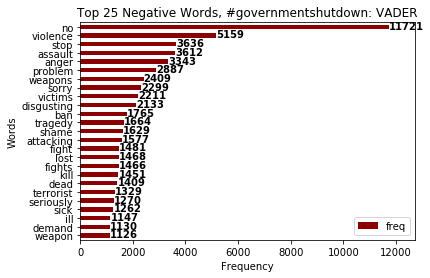

In [25]:
fig = negdf.plot(x= 'word',kind='barh', align='center', color =['darkred'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Negative Words, #governmentshutdown: VADER')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,1000 + max(freqDF['freq']))

for i, v in enumerate(negdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig(os.path.join(dataResults, 'gvShutdownNegWordsVader.png'), format='png', dpi=300, bbox_inches='tight',)

plt.show()

## VOILA!!

This code was adapted from Stefan Sinclair's GitHub page called Art of Literary Text Analysis and can be found here: https://github.com/sgsinclair/alta/blob/e908bae2c224578485e10482e812924d7c6b7b05/ipynb/utilities/ComplexSentimentAnalysis.ipynb . Accessed 01/25/2019